In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

 $A = QR$
 
 so RHS:
 
 $
 \begin{align}
 A^T N^{-1} A &= (QR)^T N^{-1} QR \\
 &= R^T Q^T N^{-1} QR \\
 \end{align}
 $
 
 also, LHS:
 
 $
 \begin{align}
 A^TN^{-1} &= R^TQ^TN^{-1} \\
 \end{align}
 $
 
 so the linear least squares thing:
 
 $
 \begin{align}
 A^TN^{-1}d &=  A^T N^{-1} Am \\
 m &= (A^T N^{-1} A)^{-1}A^TN^{-1}d \\
 &= (R^T Q^T N^{-1} QR)^{-1} R^TQ^TN^{-1} d \\
 \end{align}
 $

[[    1.           -10.           100.         -1000.        ]
 [    1.            -9.97997998    99.6000004   -994.00601001]
 [    1.            -9.95995996    99.2008024   -988.03601994]
 ...
 [    1.             9.95995996    99.2008024    988.03601994]
 [    1.             9.97997998    99.6000004    994.00601001]
 [    1.            10.           100.          1000.        ]]


'Still need to do regular fitting'

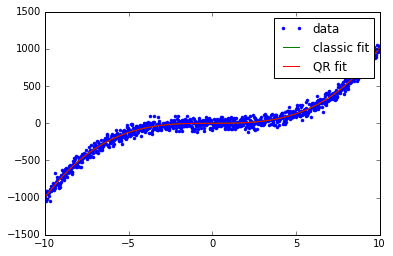

In [138]:
n = 1000
x = np.linspace(-10, 10, n)
noise = np.random.randn(n)*50.0
order = 3
y_true = x**order
dat = y_true + noise # so this is function+variance? I could make N by taking sqrt of noise at each point?
plt.plot(x, dat, '.', label='data')

a=np.zeros([n,order+1]) # why does a need to be sized n by order+1? what is A as a matrix? 
a[:,0]=1.0
for i in range(order):
    a[:,i+1]=a[:,i]*x
    
print(a)

'''classic fitting''' # where does this all come from actually
atna = np.dot(a.transpose(), a) # with no N
atn = a.transpose()
rhs = np.dot(np.linalg.inv(atna), atn)
fitp = np.dot(rhs, dat)
pred = np.dot(a, fitp)
plt.plot(x, pred, label='classic fit')






q, r = np.linalg.qr(a)
rtqt = np.dot(r.transpose(), q.transpose()) # noise? we know the real noise on the data, can we use that as N?
rtr = np.dot(r.transpose(), r) #with N = id, Q^T Q = 1. Otherwise put your N in as shown above
rhs = np.dot(np.linalg.inv(rtr), rtqt)
fitp_qr = np.dot(rhs, dat)
pred_qr = np.dot(a, fitp_qr)
plt.plot(x, pred_qr, label='QR fit')

plt.legend()


## When does QR fitting do better than classic fitting?
- when matrix $A$ is non-invertible
    - using $A = QR$ avoids taking the inverse of $A$ directly, but could there still be problems with $Q$ or $R$ being non-invertible?

# Question 2

## Part A

In [5]:
def chebs(x, ord):
    p=np.zeros([len(x),ord+1])
    p[:,0]=1.0
    p[:,1]=x
    for n in range(1,ord):
        p[:,n+1] = 2*x*p[:,n]-p[:,n-1]
    return p


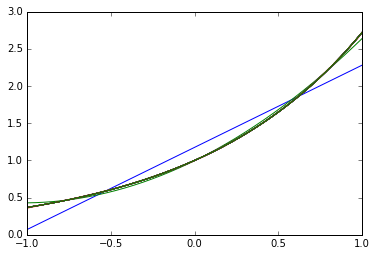

In [6]:
npt=1000
x=np.linspace(-1,1,npt)
y_true=x**3-0.5*x+0.2
y_true = np.exp(x)
y = y_true

for ord in range(1,25):
    a = chebs(x, ord)    
    lhs=np.dot(a.transpose(),a)
    rhs=np.dot(a.transpose(),y)
    lhs_inv=np.linalg.inv(lhs)
    fitp=np.dot(lhs_inv,rhs)
    pred=np.dot(a,fitp)
    plt.plot(x, pred, label=str(ord))
    #plt.show()
    rms = np.std(pred-y_true)
    #print 'for order=',ord,' rms err is ',rms
    
#plt.figure()
plt.plot(x,y, color='g')
#plt.plot(x,pred,'r')
plt.show()

## Part B

Untruncated fit with 7 terms: rms error is: 0.001266685520153994and max error is: 0.002090179812833074
Full 50 term fit: rms error is: 7.855995042545972e-05and max error is: 0.00020371424739096256
Truncated to 7 term fit: rms error is: 1.0595903293108664and max error is: -40.570575434469994
13487.665452592677


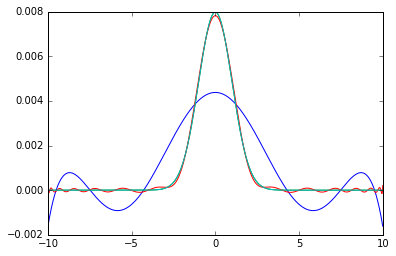

In [127]:
a = chebs(x, 6)
lhs = np.dot(a.transpose(), a)
rhs = np.dot(a.transpose(), y)
lhs_inv = np.linalg.inv(lhs)
fitp = np.dot(lhs_inv, rhs)
pred = np.dot(a, fitp)
plt.plot(x, pred)
plt.plot(x, y)
rmserr = np.std(pred - y)
maxerr = np.amax(pred - y)
#print(pred - y)
print('Untruncated fit with 7 terms: rms error is: ' + str(rmserr) + 'and max error is: ' + str(maxerr))

b = chebs(x, 50)
lhs = np.dot(b.transpose(), b)
rhs = np.dot(b.transpose(), y)
lhs_inv = np.linalg.inv(lhs)
fitp = np.dot(lhs_inv, rhs)
pred = np.dot(b, fitp)
plt.plot(x, pred)
plt.plot(x, y)
rmserr = np.std(pred - y)
maxerr = np.amax(pred - y)
print('Full 50 term fit: rms error is: ' + str(rmserr) + 'and max error is: ' + str(maxerr))

plt.figure()
# what do you mean by use the first 7 terms
b = chebs(x, 50)
lhs = np.dot(b.transpose(), b)
rhs = np.dot(b.transpose(), y)
lhs_inv = np.linalg.inv(lhs)
fitp = np.dot(lhs_inv, rhs)
fitp = fitp[:7]
b = b[:7, :7]
pred = np.dot(b, fitp)
rmserr2 = np.std(pred - y[:7])
maxerr2 = np.amax(pred - y[:7])
print('Truncated to 7 term fit: rms error is: ' + str(rmserr2) + 'and max error is: ' + str(maxerr2))

print(rmserr2/rmserr)

In [9]:
'''Question3'''

'Question3'

$
\chi ^2 &= d^TN^{-1}d
$
for $N$ diagonal, its elements are $\sigma^2_i$

but if $N$ is not diagonal, the noise is not uncorrelated, so to find the variance or standard dev for the data, use a rotation matrix to transform it into an uncorrelated frame. Use eigenvalue decomposition:

$N = V \Lambda V^T$

and then a rotated data vector $d'$ such that:

$d' = Vd$

and

$d'^T = (V^Td)^T = d^T V$

so then:

$
\begin{align}
\chi ^2 &= d^TN^{-1}d \\
&= d^T V \Lambda V^T d \\
&= d'^T \Lambda d' \\
\end{align}
$

$\Lambda$ is diagonal, so its elements are $\sigma^2_i$ for the rotated data vector, $d'$. So our rotation matrix $R$:

$R = V\sqrt{\Lambda}$

dot with the gaussian random data $x$ to get correlated data:
$d = R x$

And then unfortunately find that $<dd^T>$ does not converge to the initial noise matrix :P

In [76]:
n = 1000
x = np.random.randn(n)
N = np.eye(n) + np.ones([n,n])

reps = 1000
ddT = np.zeros((reps, n, n))
for i in range(reps):
    e, v = np.linalg.eigh(N)
    L = np.diag(e)
    rotation_matrix = np.dot(v, L**(0.5))
    d = np.dot(rotation_matrix, x)
    ddT[i] = np.outer(d, np.transpose(d))
    
print(np.mean(ddT, axis=0))


[[ 2.33335241  3.15363369  1.95821779 ...  1.12064421  4.55869163
   4.99287975]
 [ 3.15363369  4.26228177  2.64662191 ...  1.51460248  6.16128256
   6.74810788]
 [ 1.95821779  2.64662191  1.64339382 ...  0.9404775   3.82578775
   4.19017116]
 ...
 [ 1.12064421  1.51460248  0.9404775  ...  0.53821422  2.1894127
   2.39794117]
 [ 4.55869163  6.16128256  3.82578775 ...  2.1894127   8.90635693
   9.75463417]
 [ 4.99287975  6.74810788  4.19017116 ...  2.39794117  9.75463417
  10.68370475]]


# Question 4

Error is 19.531781365488012 for sigma=5 and a=0.1
Error is 34.60861692518126 for sigma=5 and a=0.5
Error is 44.87785156967742 for sigma=5 and a=0.9
Error is 42.33736892711145 for sigma=50 and a=0.1
Error is 89.4977651450814 for sigma=50 and a=0.5
Error is 119.05741215049775 for sigma=50 and a=0.9
Error is 15.99273432311786 for sigma=500 and a=0.1
Error is 12.618185449290202 for sigma=500 and a=0.5
Error is 6.1321107507148644 for sigma=500 and a=0.9


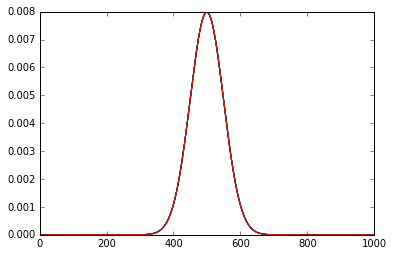

In [140]:
def delta(i, j):
    if i == j:
        return 1
    else:
        return 0
    
def gaussian(x, u, sigma):
    return 1.0/(np.sqrt(2.0*np.pi*sigma**2)) * np.exp(-(x-u)**2/(2.0*sigma**2))
    
    
n = 1000
x = np.linspace(0, 1000, 1000)
y = gaussian(x, 500, 50) # here, y is A right? the function we expect to uncover
plt.plot(x, y)

N = np.zeros([n,n]) 
avals = [0.1, 0.5, 0.9]
sigmas = [5, 50, 500]
for sigma in sigmas:
    for a in avals:
        for i in range(n):
            for j in range(n):
                N[i][j] = a*np.exp((-(i-j)**2)/(2.0*sigma**2)) + (1-a)*delta(i, j)
        atna = np.dot(y, np.dot(np.linalg.inv(N), y))
        atna_inv = 1.0/atna # = the variance
        error = np.sqrt(atna_inv)
        print('Error is ' + str(error) + ' for sigma=' + str(sigma) + ' and a=' + str(a))
        rhs = np.dot(np.dot(np.transpose(y), np.linalg.inv(N)), y)
        fitp = np.dot(atna_inv, rhs)
        pred = np.dot(fitp, y)
        plt.plot(pred, label='sigma=' + str(sigma) + ' a=' + str(a))




In [ ]:
#sigma: correlation length
# error = sqrt(<mmT> = ATN-1etc)